In [1]:
!pip install streamlit
!pip install streamlit pyngrok streamlit-option-menu pillow tensorflow


In [2]:
!pip install pyngrok
import os
from threading import Thread
from pyngrok import ngrok # This should now work after installing pyngrok

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from keras.layers import Dropout
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [26]:
!pip install streamlit

import streamlit as st
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image

# Load your trained Keras model
model = tf.keras.models.load_model('pet.ipynb') # Replace with your model file path

# Define function to preprocess image
def preprocess_image(image):
    image = image.resize((150, 150))  # Resize to match model input shape
    image = np.array(image) / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Streamlit app
st.title("Cow Disease Detection")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    if st.button("Predict"):
        preprocessed_image = preprocess_image(image)
        prediction = model.predict(preprocessed_image)
        predicted_class = np.argmax(prediction)

        # Map predicted class to disease labels (adjust as needed)
        if predicted_class == 0:
            disease = "Healthy"
        elif predicted_class == 1:
            disease = "Lumpy Skin Disease"
        else:
            disease = "Unknown"

        st.write(f"**Prediction:** {disease}")

ValueError: File format not supported: filepath=pet.ipynb. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(pet.ipynb, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [9]:
import tensorflow as tf
import os

# Set logging level to show all messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [10]:
!nvidia-smi

Mon Apr  7 17:43:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
from google.colab import drive
drive.mount('/content/drive')

X_train = []
y_train = []
image_size = 150

# Update folderPath to the mounted drive location
folderPath = '/content/drive/MyDrive/cow disease 1/archive/healthycows'  # Replace 'Your_Folder_Name' with the actual folder name

for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(0)

# Update folderPath to the mounted drive location for the second loop
folderPath = '/content/drive/MyDrive/cow disease 1/archive/lumpycows'  # Replace 'Your_Folder_Name' with the actual folder name

for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
X_train = []
y_train = []
image_size = 150

folderPath = '/content/drive/MyDrive/cow disease 1/archive/healthycows'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(0)
folderPath = '/content/drive/MyDrive/cow disease 1/archive/lumpycows'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(1)

In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train,y_train=shuffle(X_train,y_train,random_state=101)
X_train.shape

(936, 150, 150, 3)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.1,random_state=101)

In [14]:
y_train.shape

(842,)

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [19]:
history=model.fit(X_train,y_train,epochs=27,validation_split=.1,callbacks=[best_model])

Epoch 1/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 749ms/step - accuracy: 0.4797 - loss: 22.9050 - val_accuracy: 0.5059 - val_loss: 0.8616
Epoch 2/27


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.5444 - loss: 0.6931 - val_accuracy: 0.5059 - val_loss: 0.9213
Epoch 3/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.5210 - loss: 0.7028 - val_accuracy: 0.4824 - val_loss: 1.0092
Epoch 4/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5427 - loss: 0.6929 - val_accuracy: 0.5059 - val_loss: 0.9473
Epoch 5/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.5709 - loss: 0.6874 - val_accuracy: 0.4941 - val_loss: 0.8879
Epoch 6/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5905 - loss: 0.6816 - val_accuracy: 0.6235 - val_loss: 0.8094
Epoch 7/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.5489 - loss: 0.6827 - val_accuracy: 0.6706 - val_loss: 0.8176
Epoch 8/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.5227 - loss: 0.6895 - val_accuracy: 0.5647 - val_loss: 0.7031
Epoch 9/27
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5730 - loss: 0.6636 - val_accuracy: 0.6353 - val_loss: 0

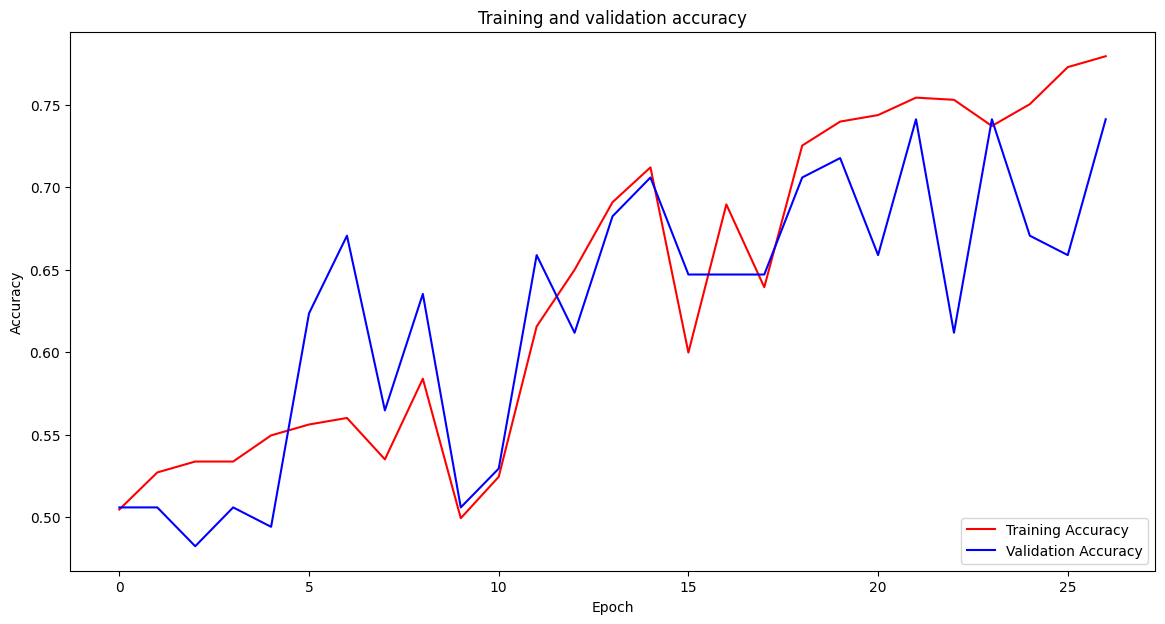

In [20]:
#model.save('LumpyDisease.h5')

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

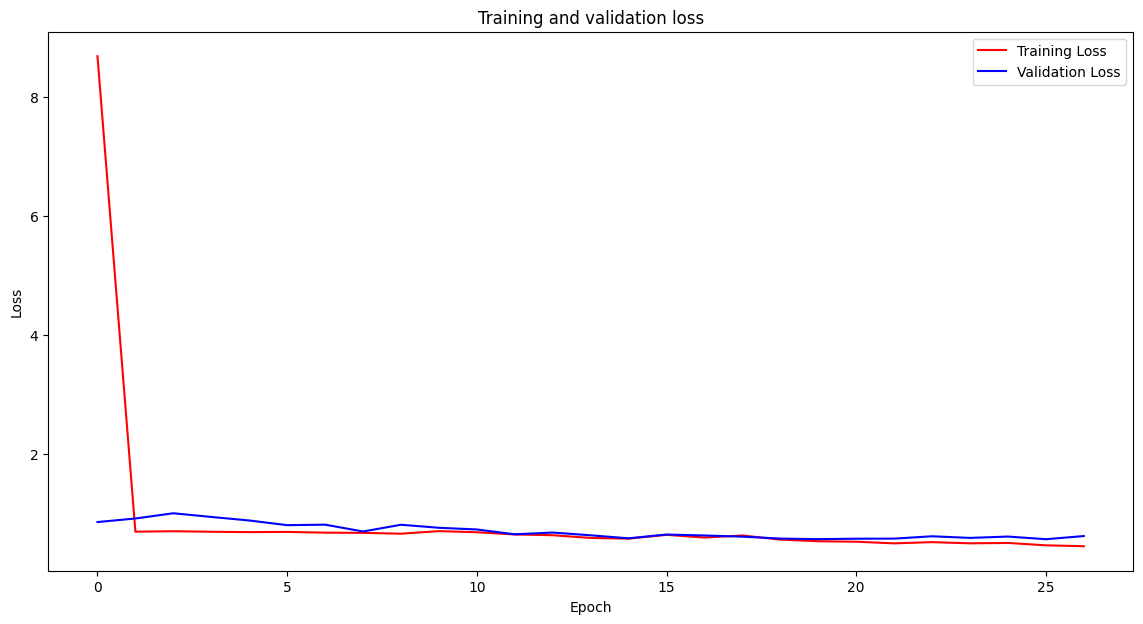

In [21]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [22]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


In [23]:
y_test.shape
pred.shape

(94,)

In [24]:
accuracy = np.sum(pred==y_test)/np.size(pred)
print("Accuracy on testing dataset: {:.2f}%".format(accuracy*100))

Accuracy on testing dataset: 62.77%


In [8]:
%%writefile app.py
import streamlit as st
from streamlit_option_menu import option_menu
from PIL import Image
import numpy as np
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model("pet_disease_model.h5")

# Labels for your model (edit this based on your model classes)
LABELS = ['Healthy', 'Mastitis', 'Foot Rot', 'Other']

# Page config
st.set_page_config(page_title="Pet Disease Detection", layout="centered", page_icon="🐄")

# Sidebar
with st.sidebar:
    selected = option_menu("Disease Detection", ["Upload Image"], icons=["camera"], menu_icon="paw", default_index=0)

# Main Page
if selected == "Upload Image":
    st.title("🐄 Cow Disease Detection from Image")
    st.write("Upload an image of the cow's infected area.")

    uploaded_file = st.file_uploader("Choose an image", type=["jpg", "jpeg", "png"])

    if uploaded_file is not None:
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded Image", use_column_width=True)

        if st.button("Predict"):
            img = image.resize((150, 150))  # Resize to match model input
            img_array = np.array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            prediction = model.predict(img_array)
            result = LABELS[np.argmax(prediction)]

            st.success(f"Prediction: **{result}**")


KeyboardInterrupt: 

In [ ]:
from pyngrok import ngrok

# Kill existing tunnels
ngrok.kill()

# Open a tunnel on port 8501
public_url = ngrok.connect(port=8501)
print(f"🌐 Public URL: {public_url}")

# Run Streamlit
!streamlit run app.py &
